In [100]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dtw import dtw

plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']  
plt.rcParams['axes.unicode_minus'] =False 

In [101]:
a = np.array([1,2,3,4])
a = np.row_stack((a,[2,4,6,8]))
len(a)
from sklearn.linear_model import LinearRegression

for i in range(4):
    model = LinearRegression()
    y = a[:, i]
    x = np.array(range(len(y))).reshape((-1, 1))
    model.fit(x, y)
    y_pred = model.predict(np.array(x[-1, 0] + 1).reshape((-1, 1)))
    print(y_pred[0])
    print(model.coef_, model.intercept_)

2.9999999999999996
[1.] 1.0
5.999999999999999
[2.] 2.0
9.0
[3.] 3.0
11.999999999999998
[4.] 4.0


In [102]:
[]

[]

In [103]:

# 绘图
def double_bar(x1, x2, ind, width, label1, label2):
    fig = plt.figure(figsize=[10,5])
    ax = fig.add_subplot(1, 1, 1)
    # fig, ax = plt.subplots()
    rects1 = ax.bar(
        ind,
        x1,
        width,
    )
    rects2 = ax.bar(
        ind + width,
        x2,
        width,
    )

    # 设置标签、标题和图例
    ax.set_ylabel("Avg Delay")
    ax.set_title("DT Avg Delay")
    ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(("G1", "G2", "G3", "G4", "G5"))
    ax.legend((rects1[0], rects2[0]), (label1, label2))
    return ax, rects1, rects2

# 添加数值标签
def autolabel(ax, rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{:.1f}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

In [104]:
def calc_indexes(sumo, ctm):
    mae = mean_absolute_error(sumo, ctm)
    mse = mean_squared_error(sumo, ctm)
    dist, cost, acc, path = dtw(np.array(ctm), np.array(sumo), dist=lambda x, y: np.abs(x - y))
    maindf = pd.DataFrame({
    'sumo':sumo,
    'ctm':ctm,
    # 'time':time0
    })
    corr = maindf.corr() 
    cov = maindf.cov()
    print(maindf.describe())
    
    
# 打印结果
    print("MAE:", mae)
    print("MSE:", mse)
    print("corr:", corr)
    print("cov:", cov)
    print("DTW距离:", dist)
    # print("DTW对齐路径:", path)

def vis(sumo, ctm, time0:np.array):
    maindf = pd.DataFrame({
    'sumo':sumo,
    'ctm':ctm,
    # 'time':time0
    })
    # print(maindf.describe())
    
    plt.plot(time0, sumo, label="sumo", marker=".")
    plt.plot(time0, ctm, label="og_ctm", marker=".")
    plt.legend()
# plt.ylim(0, 30)
    plt.show()


# # 构造数据
    # width = 15  # 每个柱子的宽度

# plt.figure(dpi=300)

    # ax, rects1, rects2 = double_bar(ctm, sumo, time0, width, 'ctm', 'sumo')
    # autolabel(ax, rects1)
    # autolabel(ax, rects2)
    # plt.show()


    # corr = maindf.corr() 
    # print(corr)
    # sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)
    # plt.show()
    # cov = maindf.cov()
    # print(cov)
    # sns.heatmap(cov, cmap='GnBu', annot=True, cbar=False)
    # plt.show()


    # sns.lmplot(
    # data = maindf,
    # x='ctm',
    # y='sumo',
    # order=1
    # )
    # plt.show()


    # temp = sumo[0]
    # for i in range(1, len(sumo)):
    #     sumo[i] += temp
    #     temp = sumo[i]
    # temp = ctm[0]
    # for i in range(1, len(ctm)):
    #     ctm[i] += temp
    #     temp = ctm[i]
    # plt.plot(time0, sumo, label="sumo")
    # plt.plot(time0, ctm, label="ctm")
    # plt.legend()
    # plt.show()


#     import numpy as np
#     ctm = np.array(ctm).reshape((-1, 1))
#     sumo = np.array(sumo)
#     from sklearn.linear_model import LinearRegression
#     model = LinearRegression()
# # 训练模型
#     model.fit(ctm, sumo)
# # 计算预测值
#     y_pred = model.predict(ctm)
# # 绘制原始数据和拟合直线
#     plt.scatter(ctm, sumo)
#     plt.plot(ctm, y_pred, color='red')
#     plt.show()
#     print(model.coef_, model.intercept_)


In [105]:
# sumo=[4.916436687313045, 4.32464819402042, 4.585994411170272, 4.918053251757599, 5.698892098106941, 5.460721909797618, 5.505356067066772, 4.618916082596014, 6.734249471826392, 6.855095817314461, 5.962608474698871, 5.251203763224334, 5.794156514867605, 5.797102305486308, 5.57793233370376, 5.213151859416871, 5.453349688430824, 6.228130087856089, 4.485736253290264, 5.5534046279251905, 4.240715622285456, 4.734758255283934, 5.141407725113381, 5.341307160555415]
# ctm= [444.4537353515625, 281.48767471313477, 414.7650909423828, 455.313720703125, 499.85240936279297, 438.1914520263672, 469.8202133178711, 322.7828598022461, 617.4297714233398, 818.3271026611328, 546.2598037719727, 283.0583190917969, 406.00963592529297, 644.7670745849609, 701.8075561523438, 426.26644134521484, 562.6451110839844, 481.8013381958008, 410.37879943847656, 372.9133605957031, 372.38250732421875, 443.71997833251953, 573.1111145019531, 709.1233062744141]
# time0 = [547, 603, 658, 711, 772, 826, 883, 940, 1001, 1055, 1111, 1169, 1233, 1291, 1347, 1400, 1458, 1518, 1573, 1627, 1686, 1745, 1805, 1860]
# sumo = [_ * 2 for _ in sumo]
# ctm = [_ / 44 for _ in ctm]

# time0 = np.array(time0)

In [106]:
# sumo_df = pd.DataFrame()
# sumo_df["{}".format(2)] = sumo
# sumo_df

## p60

            sumo        ctm
count  24.000000  24.000000
mean    4.772482   4.748385
std     0.610899   1.420046
min     3.678066   2.318449
25%     4.425980   3.447776
50%     4.542963   4.767464
75%     5.164369   5.762286
max     6.398900   7.550280
MAE: 1.0661275385075213
MSE: 1.695087044395752
corr:           sumo       ctm
sumo  1.000000  0.358239
ctm   0.358239  1.000000
cov:           sumo       ctm
sumo  0.373198  0.310775
ctm   0.310775  2.016532
DTW距离: 23.173525241145455


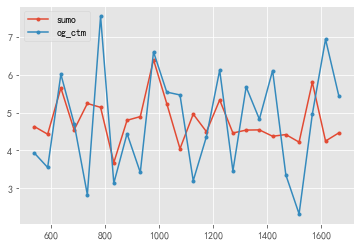

(0.0, 10.0)

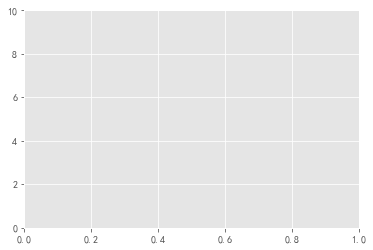

In [107]:
# sumo=[4.674946534225682, 4.222844345269094, 4.722258842323506, 4.83960570509622, 5.489239955688965, 5.241180142826672, 4.984378087400417, 5.461805791246799, 5.648878639223831, 5.6978238690360525, 4.764151320764208, 4.978141827038941, 4.546088484298518, 4.9061464983179635, 5.191756272276197, 4.327780198686553, 4.982927446363586, 4.495411930459506, 4.319398300150335, 4.565368619399643, 4.678136706002512, 4.554328584552631, 4.871087864133552, 4.616033411493819]
# ctm= [3.322774586333276, 1.6738872528440045, 3.5846455837747753, 4.870151450228647, 3.5993684082677575, 5.470502669038203, 4.012794913625347, 4.676403768377622, 3.4329734694211624, 4.8766405353827675, 4.527945765715966, 4.938487827223627, 2.8354531966937215, 2.7183619350963806, 4.714532289482501, 2.866029227522224, 4.607513868302539, 3.992491502309077, 5.187060875380746, 3.1920443581328426, 3.9874024959562844, 4.715811076859831, 4.541182371444079, 4.653973944914492]
# time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
# sumo=[4.674946534225682, 4.222844345269094, 4.722258842323506, 4.83960570509622, 5.489239955688965, 5.241180142826672, 4.984378087400417, 5.461805791246799, 5.648878639223831, 5.6978238690360525, 4.764151320764208, 4.978141827038941, 4.546088484298518, 4.9061464983179635, 5.191756272276197, 4.327780198686553, 4.982927446363586, 4.495411930459506, 4.319398300150335, 4.565368619399643, 4.678136706002512, 4.554328584552631, 4.871087864133552, 4.616033411493819]
# ctm= [4.118201553180653, 2.008711298306783, 4.582513378512475, 6.046648549509572, 4.71882473338734, 6.932275295257568, 5.054576143305352, 5.960155243569232, 4.217665168676484, 6.229786568499626, 5.714452643143503, 5.924615185670178, 3.572978194879026, 3.634661410717254, 6.194876393964214, 3.6446202054936836, 5.7173561563297195, 5.048196813562414, 6.449203897029795, 3.967203119749664, 5.009094639828331, 6.10392350416917, 5.622199273878528, 5.6247765126854485]
# time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
sumo=[4.630511022464066, 4.428306489802182, 5.651503200731655, 4.543298213866623, 5.241259253599511, 5.139274690337028, 3.6780664385017583, 4.796435104736037, 4.894257385783715, 6.398899520780268, 5.239653645421401, 4.0445889746353245, 4.959895231802058, 4.494797185866021, 5.3345817315236275, 4.459754684926264, 4.537320594281258, 4.542627060654997, 4.373679634120589, 4.41900155990438, 4.218803034860957, 5.80322607580011, 4.247320908814563, 4.462503901324287]
ctm= [0.15711441860404066, 0.14193310340245566, 0.24058985966508106, 0.18837829258130945, 0.11312185307984711, 0.30201119184494013, 0.12524683757494853, 0.17771631606081698, 0.13667381202781592, 0.264274067348904, 0.22171157918950563, 0.2186975105136049, 0.1278718095996354, 0.1746276565220045, 0.24494066343202692, 0.13832344671692512, 0.22712528705596924, 0.19301886086935524, 0.24453979989756713, 0.1340198516845703, 0.09273796280225118, 0.1982777065700955, 0.27762611963415657, 0.21787152391798956]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
ctm = [_ * 25 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)
plt.ylim([0, 10])

In [108]:
# sumo=[4.674946534225682, 4.222844345269094, 4.722258842323506, 4.83960570509622, 5.489239955688965, 5.241180142826672, 4.984378087400417, 5.461805791246799, 5.648878639223831, 5.6978238690360525, 4.764151320764208, 4.978141827038941, 4.546088484298518, 4.9061464983179635, 5.191756272276197, 4.327780198686553, 4.982927446363586, 4.495411930459506, 4.319398300150335, 4.565368619399643, 4.678136706002512, 4.554328584552631, 4.871087864133552, 4.616033411493819]
# ctm= [4.118201553180653, 2.008711298306783, 4.582513378512475, 6.046648549509572, 4.71882473338734, 6.932275295257568, 5.054576143305352, 5.960155243569232, 4.217665168676484, 6.229786568499626, 5.714452643143503, 5.924615185670178, 3.572978194879026, 3.634661410717254, 6.194876393964214, 3.6446202054936836, 5.7173561563297195, 5.048196813562414, 6.449203897029795, 3.967203119749664, 5.009094639828331, 6.10392350416917, 5.622199273878528, 5.6247765126854485]
# time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
# time0 = np.array(time0)
# # ctm = [_ * 10 for _ in ctm]
# calc_indexes(sumo, ctm)
# vis(sumo, ctm, time0)
# plt.ylim([0, 10])


In [109]:
sumo_df = pd.read_csv("Output/experiments/6/sumo.csv")
ctm_df = pd.read_csv("Output/experiments/6/ctm.csv")
time_df = pd.read_csv("Output/experiments/6/time.csv")
sumo_df.insert(0, "1", sumo)
ctm_df.insert(0, "1", ctm)
time_df.insert(0, "1", time0)
sumo_df.describe()

,1,2,3,4,5,6,7,8,9,10
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.772482,4.770659,5.412839,5.608583,4.713237,4.999660,5.575217,5.772953,4.782192,4.596547
std,0.610899,0.434223,0.629869,0.722992,0.486113,0.540889,1.023365,0.879013,0.595987,0.420650
min,3.678066,4.005135,4.384817,4.244936,3.934047,3.710457,4.449308,4.661892,3.822664,3.733156
25%,4.425980,4.484349,4.974565,5.165859,4.301751,4.536123,4.721155,5.067833,4.365380,4.279212
50%,4.542963,4.731312,5.248569,5.510981,4.546753,5.020070,5.082659,5.592177,4.842335,4.663325
75%,5.164369,4.848852,5.795350,6.119991,5.202728,5.377547,6.775488,6.350592,5.198122,4.838474
max,6.398900,5.855979,6.816946,7.003545,5.411491,5.929187,7.232770,7.390523,6.334969,5.411730


In [110]:
corr = []
cov = []
mae = []
mse = []
for col in sumo_df.columns:
    temp_df = pd.DataFrame({'sumo':sumo_df[col], 'ctm':ctm_df[col]})
    corr.append(temp_df.corr().iloc[0,1])
    cov.append(temp_df.cov().iloc[0,1])
    mae.append(mean_absolute_error(sumo_df[col], ctm_df[col]))
    mse.append(mean_squared_error(sumo_df[col], ctm_df[col]))
index_df = pd.DataFrame({
    'cov':cov,
    'corr':corr,
    'mae':mae,
    'mse':mse,
})
# index_df = index_df.T
index_df.index = [str(i) for i in range(1, 11)]
index_df

,cov,corr,mae,mse
1,0.310775,0.358239,1.066128,1.695087
2,0.059062,0.463879,3.423853,11.872657
3,0.138680,0.365181,3.910775,15.756924
4,0.160755,0.456693,4.392915,19.717688
5,0.036665,0.525827,3.964478,15.892986
6,0.058637,0.521000,4.420639,19.751522
7,0.139169,0.654777,5.093998,26.727057
8,-0.008423,-0.092883,5.413404,30.071753
9,0.025360,0.516468,4.454562,20.141418
10,0.008188,0.272483,4.150216,17.383067


In [115]:
a = sumo_df.describe().T[['count','mean', 'std','min','max']].merge(index_df, left_index=True,right_index=True)
a = a.sort_values('mean', axis = 0).iloc[:-1]
a

,count,mean,std,min,max,cov,corr,mae,mse
10,24.0,4.596547,0.420650,3.733156,5.411730,0.008188,0.272483,4.150216,17.383067
5,24.0,4.713237,0.486113,3.934047,5.411491,0.036665,0.525827,3.964478,15.892986
2,24.0,4.770659,0.434223,4.005135,5.855979,0.059062,0.463879,3.423853,11.872657
1,24.0,4.772482,0.610899,3.678066,6.398900,0.310775,0.358239,1.066128,1.695087
9,24.0,4.782192,0.595987,3.822664,6.334969,0.025360,0.516468,4.454562,20.141418
6,24.0,4.999660,0.540889,3.710457,5.929187,0.058637,0.521000,4.420639,19.751522
3,24.0,5.412839,0.629869,4.384817,6.816946,0.138680,0.365181,3.910775,15.756924
7,24.0,5.575217,1.023365,4.449308,7.232770,0.139169,0.654777,5.093998,26.727057
4,24.0,5.608583,0.722992,4.244936,7.003545,0.160755,0.456693,4.392915,19.717688


<AxesSubplot:>

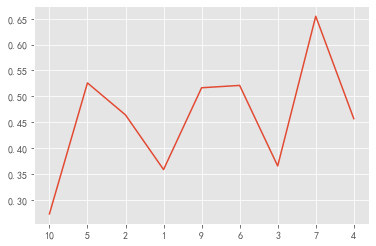

In [116]:
a['corr'].plot()


<AxesSubplot:>

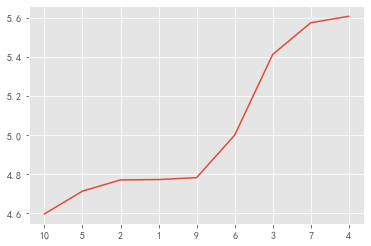

In [117]:
a['mean'].plot()

<AxesSubplot:>

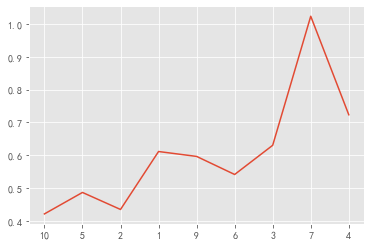

In [118]:
a['std'].plot()


## p61

In [ ]:
sumo=[9.349893068451363, 8.284384558566787, 8.786113845137518, 10.55358670460196, 11.55627641072082, 10.157626142455765, 7.948787061276861, 8.953242018696939, 9.61148215963248, 10.008960241294197, 9.95935862828683, 8.037188066772181, 7.370990480779991, 9.196076916790208, 9.605174812496442, 10.595069910481893, 10.216945558102354, 9.622271371599671, 11.027647477335353, 9.834366319469478, 8.200965373232515, 11.745130189312139, 9.149048815597085, 9.395888865061728]
ctm= [6.133321415294301, 4.0170535174283115, 6.972390521656383, 9.712251316417348, 8.178526271473277, 10.990502617575906, 7.696093645962802, 9.262580871582031, 5.794609243219549, 8.059409748424184, 7.661757902665571, 7.530501105568626, 6.118129816922274, 6.838244524869052, 8.203638250177557, 6.993135105479848, 7.695074081420898, 7.2561281377618965, 8.704861727627842, 8.88575553894043, 5.679057294672186, 9.74308880892667, 8.218569322065873, 7.554625597867099]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 1 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)


## p62

In [ ]:
sumo=[11.422716163296238, 9.191150014972473, 11.783237931051358, 11.615562546776276, 10.682905702677333, 9.568385985111805, 9.199636858973717, 9.471490910636499, 11.256177573448143, 13.89431877705985, 9.885687552580249, 8.999686889051214, 9.151159326767099, 12.254151276585235, 13.1281297991357, 9.9853965232148, 10.934290378722933, 10.209295949558886, 10.205897048196475, 8.810447448791667, 8.952371592998013, 13.848928306253233, 11.476506477272883, 9.972674891694167]
ctm= [8.01215865395286, 10.867995348843662, 9.134291735562412, 8.397396261041814, 8.84451606056907, 8.659843098033559, 9.456254785711115, 6.662623665549538, 6.976649977944114, 7.398441488092596, 9.331031279130416, 8.835586201060902, 10.396417271007191, 12.770519256591797, 5.375936248085716, 5.865579084916548, 9.865874377163975, 8.026949275623668, 5.378046469254927, 5.407371954484419, 5.870262492786754, 7.412042617797852, 6.496041471307928, 6.7106632752852]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 4 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p63

In [ ]:
sumo=[11.422716163296238, 9.142566798003019, 12.081144854556298, 13.181235689003158, 10.5689860861862, 11.595552606166464, 11.272777859054813, 13.962537205122322, 11.2670623202687, 12.262952261372526, 10.792333343106014, 12.045977369439099, 10.225023757470614, 10.712922083205477, 9.720883464963169, 10.3647479454907, 10.632226976223262, 11.133208350601956, 9.459010295891622, 11.066874908102978, 7.973909031761267, 12.353492386180383, 9.725963218516622, 9.47340180803542]
ctm= [7.297382354736328, 8.148793307217685, 6.920641985806552, 7.255448428067294, 7.868606393987482, 9.108984687111594, 7.481801293113015, 5.975552038712935, 7.090327089483088, 8.174293691461736, 8.690176010131836, 5.942186442288485, 7.6062687960538, 6.334378069097346, 2.843842723152854, 2.961281646381725, 5.29215162450617, 3.4667840870943936, 4.1147049990567295, 2.829832813956521, 3.114426786249334, 2.6974240216341885, 4.600571719082919, 3.7206029891967773]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 5 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p64

In [ ]:
sumo=[9.160924711216333, 8.114175731153978, 9.740879903355804, 10.350059720322555, 10.377187498256921, 8.019695708481061, 8.092169024448122, 9.539615128395758, 9.75700583024396, 12.347791038778634, 10.732839141749043, 9.64923125385264, 9.525154238969936, 9.419235630026266, 9.516757275661002, 8.698967515793278, 8.93799042432944, 10.632353126126695, 9.940977040715506, 10.443904753627793, 8.103499411311608, 11.436498068262924, 8.819669463540004, 8.896485950465937]
ctm= [1.4040208946574817, 2.3022890090942383, 3.028495094992898, 4.920306205749512, 3.560805320739746, 3.1856601888483222, 3.74504262750799, 3.846329775723544, 3.823287703774192, 4.142607342113148, 3.717203140258789, 3.875924890691584, 3.505116592754017, 4.034791426225142, 4.786184050820091, 2.732237685810436, 4.838014515963468, 2.7589004689996894, 3.222451860254461, 3.7758887897838247, 3.3352834528142754, 4.42609266801314, 3.9057077061046255, 3.363268808885054]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 6 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p65

In [ ]:
sumo=[11.402455504448437, 9.262140415290649, 11.494261896050043, 10.290800940928554, 12.942288114951484, 12.956739235369605, 10.529664620339611, 11.346354161360708, 9.617138753504825, 9.905324466104815, 10.431002811702372, 10.94519036307734, 11.931791927089234, 8.391205669496703, 10.31068655767732, 9.840597447637437, 10.90547209525361, 10.437821051038252, 10.659011533678182, 10.25536880100578, 9.033554543965316, 12.07752042187143, 9.00596595572175, 9.165142192216578]
ctm= [4.164944995533336, 4.791921702298251, 4.417481422424316, 3.3698907765475186, 3.897014097733931, 4.168183153325861, 5.249497240239924, 3.5200402953407983, 3.478296236558394, 4.355972896922719, 4.045475612987172, 3.944590308449485, 4.690541787581011, 2.7285374294627798, 1.8321273543617942, 1.779170578176325, 2.4917166883295234, 1.1035823822021484, 1.5807718580419368, 1.9514799118041992, 2.1413855119185015, 1.2986433506011963, 1.4735405011610552, 1.7667439850893887]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 7 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p66


In [ ]:
sumo=[11.238294357633375, 9.151460074133782, 11.445054422986766, 10.058498063450726, 11.692446664115565, 11.19631112207578, 10.555899644442354, 9.265169570211262, 10.244009928214924, 10.300811462036531, 11.787282003599508, 10.630800421196174, 11.583953112730049, 10.303798643072051, 10.69487341074827, 10.35989624884482, 9.898804200815364, 9.241188192876537, 10.110480305495555, 10.60447266198866, 8.859701944629826, 11.011224749798211, 8.849701495330642, 9.052345436038365]
ctm= [3.001105785369873, 3.4425793994556773, 3.646183880892667, 2.956604307348078, 3.402027867057107, 2.8729709711941807, 3.01470626484264, 4.044875231656161, 2.5796435096047143, 3.6790318922563032, 2.890759814869274, 2.9916182431307705, 2.6640666614879263, 1.724694100293246, 1.092149019241333, 1.1201131343841553, 1.2729797580025413, 1.4674969152970747, 1.2088099392977627, 1.2175033309242942, 1.2960409034382214, 1.4742979136380283, 1.5633761882781982, 1.360357241197066]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 8 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p67


In [ ]:

ctm = [_ * 20 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p68

In [ ]:

calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p69

In [ ]:

calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)